# Refactoring

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
home = "../.."
images_dir = os.path.join(home, "static/images/")
plt.rcParams['figure.figsize'] = [5, 5]

## Productivity Plots

### The Exponential Power of Good Software Design

/Users/b.feifke/code/personal-website/code/.venv/lib/python3.10/site-packages/numpy/lib/scimath.py:386: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)/nx.log(n)


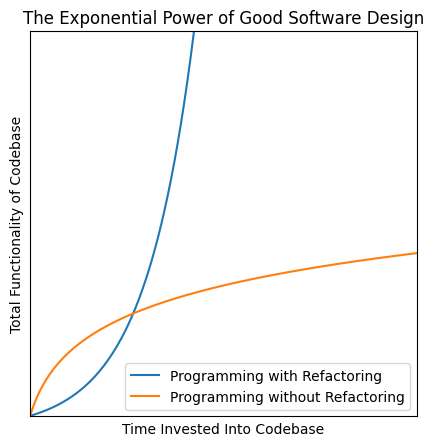

In [3]:
x = np.linspace(0, 20, 1000)
base = 1.5
log_x = np.emath.logn(base, x) + base
x_pow_e = base ** (x - base)
plt.plot(x, x_pow_e, label="Programming with Refactoring")
plt.plot(x, log_x, label="Programming without Refactoring")
plt.xlim((.7, 20))
plt.ylim((.7, 20))
plt.xticks([])
plt.yticks([])
plt.xlabel("Time Invested Into Codebase")
plt.ylabel("Total Functionality of Codebase")
plt.title("The Exponential Power of Good Software Design")
plt.legend()

plt.savefig(os.path.join(images_dir, "log_vs_exponential_returns.png"))

### Data Science Software Expectation vs Reality

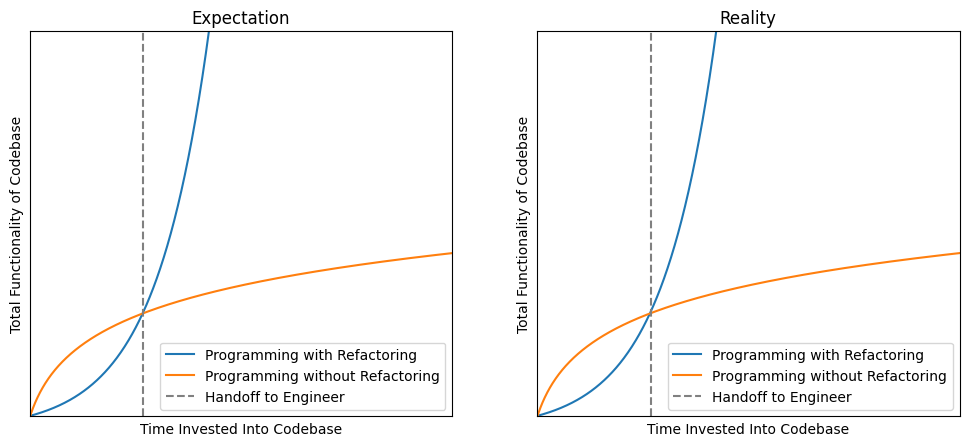

In [25]:
x = np.linspace(0, 20, 1000)
base = 1.5
log_x = np.emath.logn(base, x) + base
x_pow_e = base ** (x - base)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for i, title in enumerate(["Expectation", "Reality"]):
    axs[i].plot(x, x_pow_e, label="Programming with Refactoring")
    axs[i].plot(x, log_x, label="Programming without Refactoring")
    axs[i].set_xlim((.7, 20))
    axs[i].set_ylim((.7, 20))
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_xlabel("Time Invested Into Codebase")
    axs[i].set_ylabel("Total Functionality of Codebase")
    axs[i].set_title(title)
    axs[i].axvline(x=5.9, color="gray", linestyle="--", label="Handoff to Engineer")
    axs[i].legend(loc="lower right")

plt.savefig(os.path.join(images_dir, "log_vs_exponential_returns.png"))

## Refactoring Example

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


def load_df():
    df = pd.read_csv('../data/titanic_dataset.csv')
    df["is_male"] = df["Sex"] == "male"
    return df


def evaluate_adaboost_model(data):
    X = data[["is_male", "SibSp", "Pclass", "Fare"]]
    y = data['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = AdaBoostClassifier()
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    return accuracy


def evaluate_random_forest_model(data):
    X = data[["is_male", "SibSp", "Pclass", "Fare"]]
    y = data['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    return accuracy


df = load_df()

accuracy_adaboost = evaluate_adaboost_model(df)
print(f"AdaBoost Accuracy: {accuracy_adaboost:.3f}")

accuracy_random_forest = evaluate_random_forest_model(df)
print(f"Random Forest Accuracy: {accuracy_random_forest:.3f}")

AdaBoost Accuracy: 0.754
Random Forest Accuracy: 0.771


### First Refactor: Fixing Duplicated Code by Pulling Up a Method

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


def load_df():
    df = pd.read_csv('../data/titanic_dataset.csv')
    df["is_male"] = df["Sex"] == "male"
    return df


def evaluate_model(data, model_constructor):
    X = data[["is_male", "SibSp", "Pclass", "Fare"]]
    y = data['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = model_constructor()
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    return accuracy


df = load_df()

accuracy_adaboost = evaluate_model(df, AdaBoostClassifier)
print(f"AdaBoost Accuracy: {accuracy_adaboost:.3f}")

accuracy_random_forest = evaluate_model(df, RandomForestClassifier)
print(f"Random Forest Accuracy: {accuracy_random_forest:.3f}")

AdaBoost Accuracy: 0.771
Random Forest Accuracy: 0.799


### Second Refactor: Fixing a Mysterious Name by Renaming the Variable

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


def load_titanic_passengers_df():
    titanic_passengers_df = pd.read_csv('../data/titanic_dataset.csv')
    titanic_passengers_df["is_male"] = titanic_passengers_df["Sex"] == "male"
    return titanic_passengers_df


def evaluate_model(data, model_constructor):
    X = data[["is_male", "SibSp", "Pclass", "Fare"]]
    y = data['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = model_constructor()
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    return accuracy


titanic_passengers_df = load_df()

accuracy_adaboost = evaluate_model(titanic_passengers_df, AdaBoostClassifier)
print(f"AdaBoost Accuracy: {accuracy_adaboost:.3f}")

accuracy_random_forest = evaluate_model(titanic_passengers_df, RandomForestClassifier)
print(f"Random Forest Accuracy: {accuracy_random_forest:.3f}")

accuracy_xgboost = evaluate_model(df, XGBClassifier)
print(f"XGBoost Accuracy: {accuracy_xgboost:.3f}")

AdaBoost Accuracy: 0.777
Random Forest Accuracy: 0.827
XGBoost Accuracy: 0.832


### Third Refactor: Fix Magic Values by Extracting Variables

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


MODEL_FEATURES = ["is_male", "SibSp", "Pclass", "Fare"]
MODEL_TARGET = "Survived"
TRAIN_TEST_SPLIT_FRACTION = 0.2


def load_titanic_passengers_df():
    titanic_passengers_df = pd.read_csv('../data/titanic_dataset.csv')
    titanic_passengers_df["is_male"] = titanic_passengers_df["Sex"] == "male"
    return titanic_passengers_df


def evaluate_model(data, model_constructor):
    X = data[MODEL_FEATURES]
    y = data[MODEL_TARGET]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TRAIN_TEST_SPLIT_FRACTION)
    
    model = model_constructor()
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    return accuracy


titanic_passengers_df = load_df()

accuracy_adaboost = evaluate_model(titanic_passengers_df, AdaBoostClassifier)
print(f"AdaBoost Accuracy: {accuracy_adaboost:.3f}")

accuracy_random_forest = evaluate_model(titanic_passengers_df, RandomForestClassifier)
print(f"Random Forest Accuracy: {accuracy_random_forest:.3f}")

accuracy_xgboost = evaluate_model(df, XGBClassifier)
print(f"XGBoost Accuracy: {accuracy_xgboost:.3f}")

AdaBoost Accuracy: 0.732
Random Forest Accuracy: 0.821
XGBoost Accuracy: 0.832
